In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [48]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 15.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Load Metadata Overview

In [64]:
df = pd.read_excel('Cleaned Data/Metadata/metadata_overview_oxford.xlsx')
df

,Participant ID,baseline_date,baselinesampletime,baseline_medications,maternal_height,maternal_weight,prepreg BMI,baseline_comorbidities_685,deliverydate,delivery_time,...,Comorbidity_2,Comorbidity_3,gestagebirth_weeks,deliverymeds_1,deliverymeds_2,deliverymeds_3,deliverymeds_4,regularPN_med_clean,baseline_pregdetails,delivery_datetime
0,LAC0218,2023-06-09,10:00,NaN,1.65,57.80,21.23,No,2023-08-07,15:41:00,...,NaN,NaN,40.428571,Induction or augmentation of labour with oxytocin,NaN,NaN,NaN,Fragmin (dalteparin),36.285714,2023-08-07 15:41:00
1,LAC0221,NaT,11:20,Diet controlled,1.60,49.00,19.14,Yes,2023-08-08,13:09:00,...,NaN,NaN,39.714286,Epidural,NaN,NaN,NaN,Fragmin (dalteparin),32.571429,2023-08-08 13:09:00
2,LAC0228,NaT,12:50,Omeprazole 20mg,1.64,78.80,29.30,No,2023-05-09,10:01:00,...,NaN,NaN,41.428571,Induction or augmentation of labour with oxytocin,Epidural,NaN,NaN,NaN,32.428571,2023-05-09 10:01:00
3,LAC0229,NaT,11:00,NaN,1.62,64.00,24.39,No,NaT,09:51:00,...,NaN,NaN,41.571429,Unknown,NaN,NaN,NaN,NaN,36.285714,NaT
4,LAC0230,NaT,11:27,NaN,1.63,55.00,20.70,No,NaT,06:06:00,...,NaN,NaN,41.857143,Epidural,NaN,NaN,NaN,Fragmin (dalteparin),36.000000,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,LAC0459,NaT,11:10,NaN,1.68,55.00,19.49,No,2025-09-02,00:59:00,...,NaN,NaN,42.285714,Induction or augmentation of labour with oxytocin,NaN,NaN,NaN,NaN,39.000000,2025-09-02 00:59:00
141,LAC0460,NaT,12:10,Vit D,1.65,57.60,21.16,No,2025-10-02,16:37:00,...,NaN,NaN,39.142857,Epidural,NaN,NaN,NaN,NaN,36.142857,2025-10-02 16:37:00
142,LAC0462,NaT,11:10,Fragmin\nMetformin\nAspirin\nLantus\nAspirin\n...,1.68,99.00,35.08,Yes,NaT,09:35:00,...,NaN,NaN,39.000000,Diamorphine,Antiemetics,Other,NaN,Fragmin (dalteparin),35.857143,NaT
143,LAC0469,NaT,11:45,Levothyroxine 50mg OD you,1.68,77.65,27.51,Yes,NaT,09:17:00,...,NaN,NaN,42.000000,Other,NaN,NaN,NaN,NaN,31.857143,NaT


## Demographics

In [5]:
## Maternal Demographics

mat = pd.read_excel('/Users/kspann/Desktop/Oxford/Cleaned Data/Subsets/maternal_characteristics.xlsx')
mat.head()

,Participant ID,mat_age,mat_ethnicity,Parity,Gravida,Primiparity,BMI_categories,maternal_height,maternal_weight,prepreg BMI,Delivery Method
0,LAC0218,32.0,White,1.0,2.0,No,Normal weight,1.65,57.8,21.23,Forceps
1,LAC0221,40.0,Asian/Asian British,1.0,3.0,No,Normal weight,1.60,49.0,19.14,Elective Caesarean Section
2,LAC0228,33.0,White,1.0,2.0,No,Overweight,1.64,78.8,29.30,Emergency Caesarean Section
3,LAC0229,29.0,Asian/Asian British,0.0,1.0,Yes,Normal weight,1.62,64.0,24.39,Spontaneous Vaginal Delivery (SVD)
4,LAC0230,37.0,White,0.0,3.0,Yes,Normal weight,1.63,55.0,20.70,Emergency Caesarean Section


Text(0.5, 1.0, 'Distribution of Maternal Age')

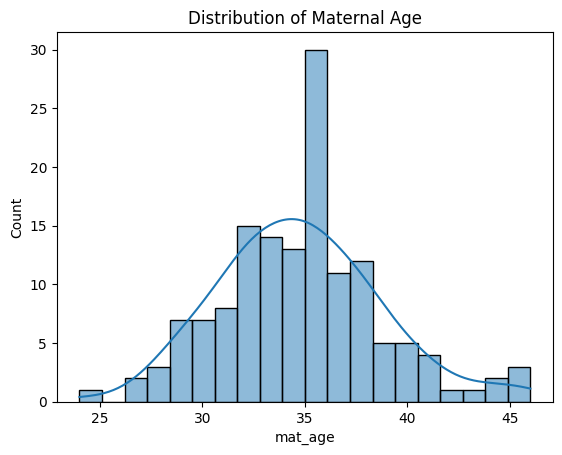

In [11]:
# Age distribution
sns.histplot(mat['mat_age'], bins=20, kde=True)
plt.title('Distribution of Maternal Age')

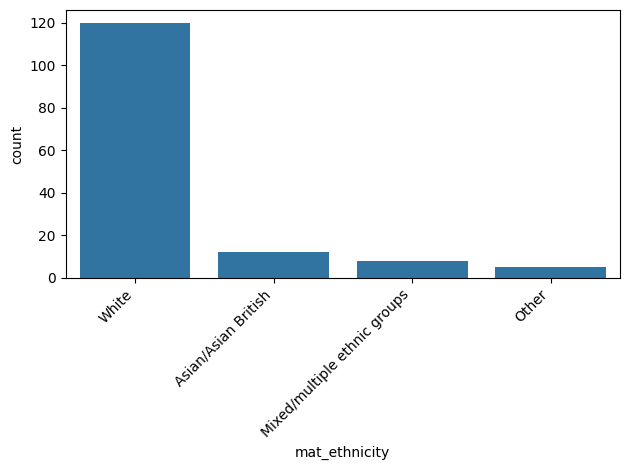

In [24]:
# Ethnicity distribution

sns.countplot(x='mat_ethnicity', data=mat)
plt.xticks(rotation=45, ha='right')  # rotate 45°, align right
plt.tight_layout()
plt.show()

<Axes: xlabel='BMI_categories', ylabel='Count'>

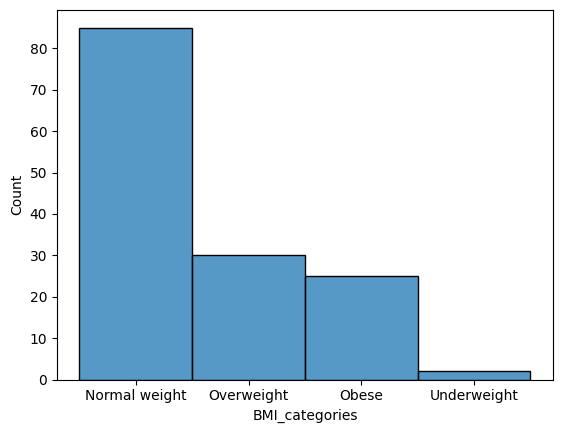

In [14]:
# BMI
sns.histplot(mat['BMI_categories'], bins=10, kde=False)

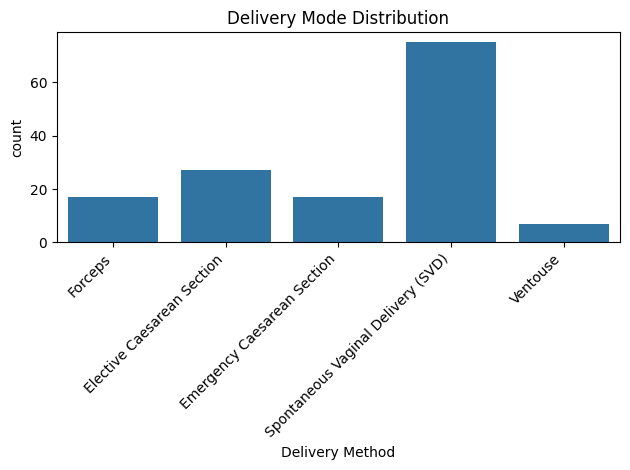

In [23]:
# Delivery mode breakdown
sns.countplot(x='Delivery Method', data=mat)
plt.title('Delivery Mode Distribution')
plt.xticks(rotation=45, ha='right')  # rotate 45°, align right
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Parity Distribution')

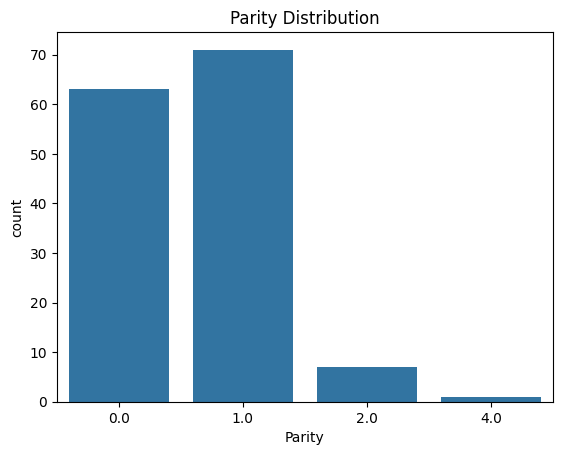

In [ ]:
# number of previous births
sns.countplot(x='Parity', data=mat)
plt.title('Parity Distribution')

Text(0.5, 1.0, 'Gravida Distribution')

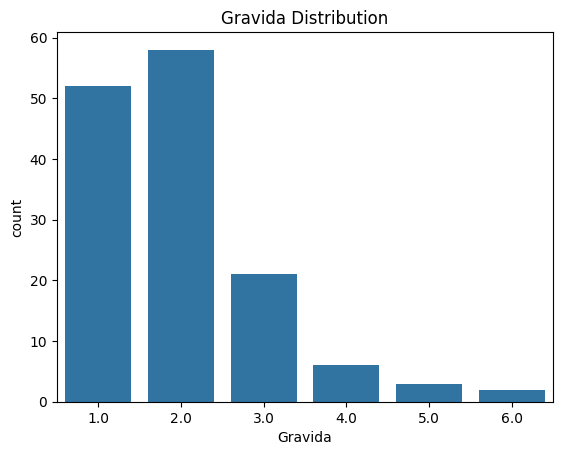

In [ ]:
# number of pregnancies
sns.countplot(x='Gravida', data=mat)
plt.title('Gravida Distribution')

Text(0.5, 1.0, 'Primiparity Distribution')

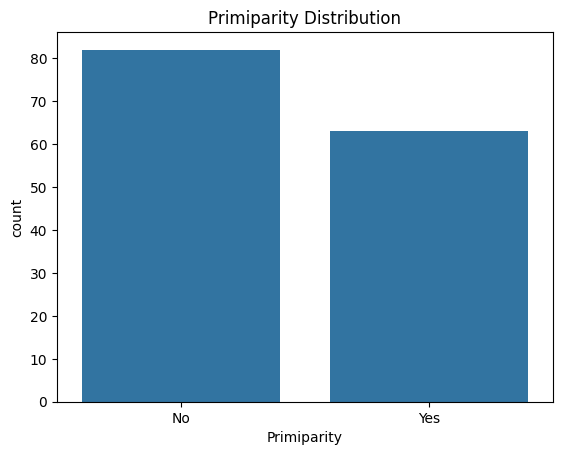

In [44]:
sns.countplot(x='Primiparity', data=mat)
plt.title('Primiparity Distribution')

#### Heatmap of correlations between continuous maternal variables

In [30]:
bmi_map = {
    'Underweight': 1,
    'Normal weight': 2,
    'Overweight': 3,
    'Obese': 4
}
mat['BMI_numeric'] = mat['BMI_categories'].map(bmi_map)


In [32]:
mat_encoded = pd.get_dummies(mat, columns=['Delivery Method', 'mat_ethnicity'], drop_first=True)


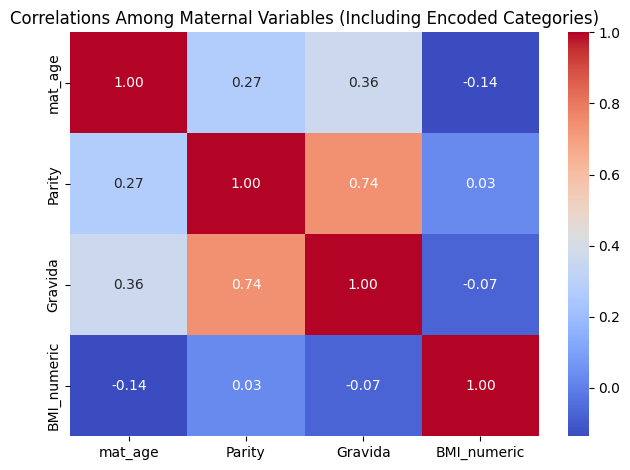

In [37]:
numeric_subset = mat_encoded[['mat_age', 'Parity', 'Gravida', 'BMI_numeric']]

corr_matrix = numeric_subset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlations Among Maternal Variables (Including Encoded Categories)')
plt.tight_layout()
plt.show()

### ANOVA and Post-hoc tests

- Does maternal age correlate with type of delivery method?

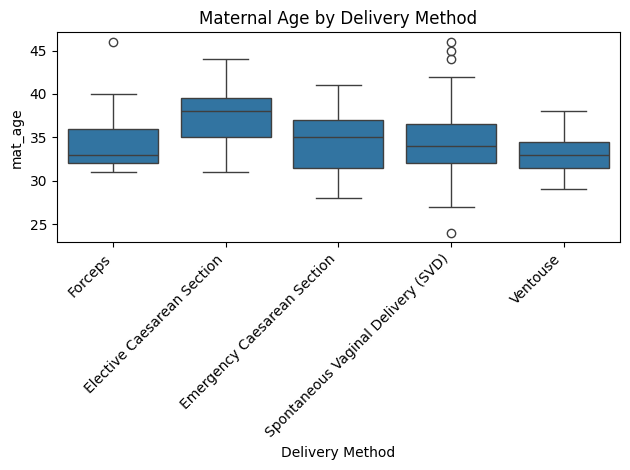

In [45]:
sns.boxplot(x='Delivery Method', y='mat_age', data=mat)
plt.xticks(rotation=45, ha='right')
plt.title('Maternal Age by Delivery Method')
plt.tight_layout()


In [56]:
mat.rename(columns={'Delivery Method': 'DeliveryMethod'}, inplace=True)

model = ols('mat_age ~ C(DeliveryMethod)', data=mat).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                        sum_sq     df         F    PR(>F)
C(DeliveryMethod)   207.720938    4.0  3.503769  0.009315
Residual           2030.511457  137.0       NaN       NaN


In [ ]:
### seeing that the ANOVA is significant, we can do post-hoc tests

#tells you which specific delivery methods differ in maternal age after your ANOVA found a significant overall effect

In [58]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1) keep complete cases
mask = mat['mat_age'].notna() & mat['DeliveryMethod'].notna()
tmp = mat.loc[mask, ['mat_age', 'DeliveryMethod']].copy()

# 2) make groups categorical (no mixed types)
tmp['DeliveryMethod'] = tmp['DeliveryMethod'].astype('category')

# 3) ensure outcome is numeric
tmp['mat_age'] = pd.to_numeric(tmp['mat_age'], errors='coerce')

# 4) (optional) drop groups with < 2 observations (Tukey needs ≥2 per group)
counts = tmp['DeliveryMethod'].value_counts()
keep = counts[counts >= 2].index
tmp = tmp[tmp['DeliveryMethod'].isin(keep)]

# Run Tukey HSD
tukey = pairwise_tukeyhsd(endog=tmp['mat_age'], groups=tmp['DeliveryMethod'], alpha=0.05)
print(tukey.summary())

                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                             
              group1                             group2               meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------------
        Elective Caesarean Section        Emergency Caesarean Section  -3.0972 0.0858 -6.4549  0.2605  False
        Elective Caesarean Section                            Forceps  -2.8105 0.1334 -6.1056  0.4847  False
        Elective Caesarean Section Spontaneous Vaginal Delivery (SVD)  -2.9422 0.0076 -5.3308 -0.5537   True
        Elective Caesarean Section                           Ventouse  -4.0794  0.097 -8.5933  0.4346  False
       Emergency Caesarean Section                            Forceps   0.2868 0.9995 -3.4202  3.9938  False
       Emergency Caesarean Section Spontaneous Vaginal Delivery (SVD)    0.155 0.9999 -2.7758  3.0858  False
       Emergency Ca

- p = 0.0375, meaning mothers who had **elective C-sections** were significantly older than those with **spontaneous vaginal deliveries**.

- Does delivery method corre

In [ ]:
from scipy.stats import chi2_contingency

# Create contingency table
table = pd.crosstab(mat['DeliveryMethod'], mat['Primiparity'])       #no = delivered before; yes = first birth
print(table)

# Run Chi-Square test
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi2 statistic = {chi2:.3f}")
print(f"Degrees of freedom = {dof}")
print(f"P-value = {p:.4f}")

Primiparity                         No  Yes
DeliveryMethod                             
Elective Caesarean Section          22    5
Emergency Caesarean Section          4   13
Forceps                              4   13
Spontaneous Vaginal Delivery (SVD)  49   26
Ventouse                             2    5
Chi2 statistic = 26.516
Degrees of freedom = 4
P-value = 0.0000


In [ ]:
## Calculate Cramer's V , an effect size for chi-square tests, anything over 0.1 is a small effect, over 0.3 is medium, over 0.5 is large

n = table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(table.shape)-1)))
print(f"Cramer's V = {cramers_v:.3f}")

Cramer's V = 0.431


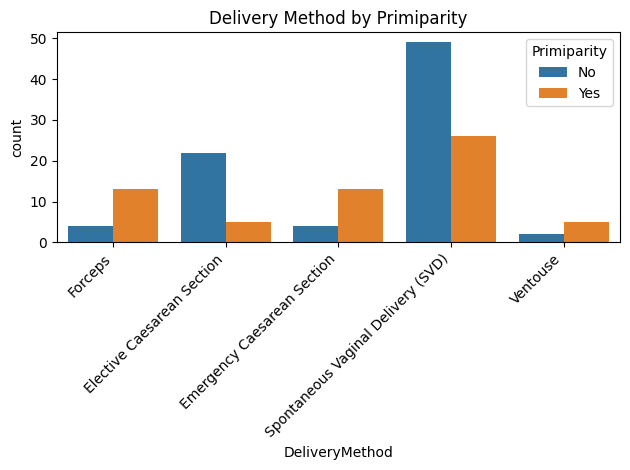

In [61]:
sns.countplot(x='DeliveryMethod', hue='Primiparity', data=mat)
plt.xticks(rotation=45, ha='right')
plt.title('Delivery Method by Primiparity')
plt.tight_layout()
plt.show()

In [67]:
df[['baseline_pregdetails', 'Gest_Age_Baseline', 'Gest_Age_Birth']]

,baseline_pregdetails,Gest_Age_Baseline,Gest_Age_Birth
0,36.285714,254.0,283.0
1,32.571429,228.0,278.0
2,32.428571,227.0,290.0
3,36.285714,254.0,291.0
4,36.000000,252.0,293.0
...,...,...,...
140,39.000000,273.0,296.0
141,36.142857,253.0,274.0
142,35.857143,251.0,273.0
143,31.857143,223.0,294.0


In [66]:
df[['baseline_pregdetails', 'Gest_Age_Baseline', 'Gest_Age_Birth']].corr()


,baseline_pregdetails,Gest_Age_Baseline,Gest_Age_Birth
baseline_pregdetails,1.000000,1.000000,0.212539
Gest_Age_Baseline,1.000000,1.000000,0.212539
Gest_Age_Birth,0.212539,0.212539,1.000000


In [69]:
model = ols('Gravida ~ C(DeliveryMethod)', data=mat).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                       sum_sq     df         F    PR(>F)
C(DeliveryMethod)    8.993782    4.0  2.093703  0.085033
Residual           144.977647  135.0       NaN       NaN


In [70]:
model = ols('Parity ~ C(DeliveryMethod)', data=mat).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                      sum_sq     df        F    PR(>F)
C(DeliveryMethod)   7.054115    4.0  4.77283  0.001241
Residual           49.881599  135.0      NaN       NaN


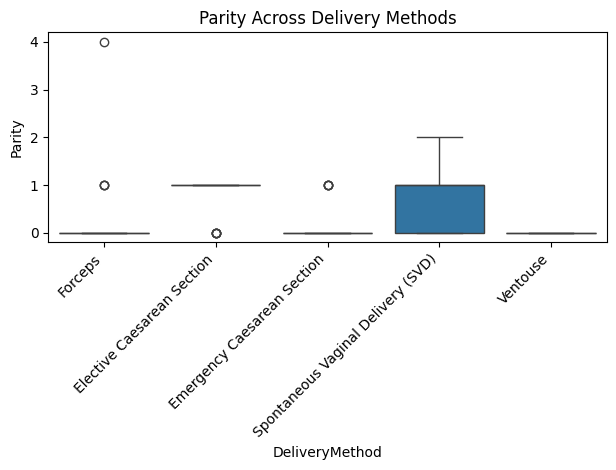

In [73]:
sns.boxplot(x='DeliveryMethod', y='Parity', data=mat)
plt.xticks(rotation=45, ha='right')
plt.title('Parity Across Delivery Methods')
plt.tight_layout()
plt.show()


In [74]:
# 1) keep complete cases
mask = mat['Parity'].notna() & mat['DeliveryMethod'].notna()
tmp = mat.loc[mask, ['Parity', 'DeliveryMethod']].copy()

# 2) make groups categorical (no mixed types)
tmp['DeliveryMethod'] = tmp['DeliveryMethod'].astype('category')

# 3) ensure outcome is numeric
tmp['Parity'] = pd.to_numeric(tmp['Parity'], errors='coerce')

# 4) (optional) drop groups with < 2 observations (Tukey needs ≥2 per group)
counts = tmp['DeliveryMethod'].value_counts()
keep = counts[counts >= 2].index
tmp = tmp[tmp['DeliveryMethod'].isin(keep)]

# Run Tukey HSD
tukey = pairwise_tukeyhsd(endog=tmp['Parity'], groups=tmp['DeliveryMethod'], alpha=0.05)
print(tukey.summary())

                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                             
              group1                             group2               meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------------
        Elective Caesarean Section        Emergency Caesarean Section  -0.5724 0.0249 -1.0966 -0.0482   True
        Elective Caesarean Section                            Forceps  -0.3959 0.2312 -0.9202  0.1283  False
        Elective Caesarean Section Spontaneous Vaginal Delivery (SVD)  -0.0744 0.9833 -0.4569  0.3081  False
        Elective Caesarean Section                           Ventouse  -0.8077 0.0561 -1.6284   0.013  False
       Emergency Caesarean Section                            Forceps   0.1765 0.9155    -0.4   0.753  False
       Emergency Caesarean Section Spontaneous Vaginal Delivery (SVD)    0.498 0.0227  0.0466  0.9495   True
       Emergency Ca

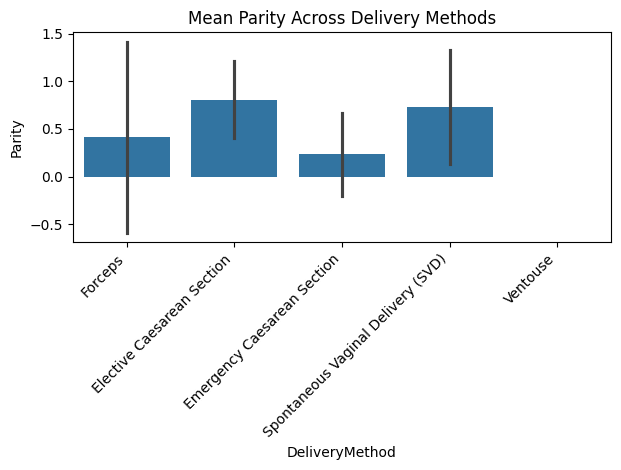

In [77]:
sns.barplot(x='DeliveryMethod', y='Parity', data=mat, errorbar='sd')
plt.xticks(rotation=45, ha='right')
plt.title('Mean Parity Across Delivery Methods')
plt.tight_layout()
plt.show()


- Does maternal health and complication variables influence delivery method? And with type of delivery method?

In [89]:
# pre-existing / baseline health conditions 

base = ['Anaemia', 'Hypothyroid', 'Hyperthyroid', 'Levothyroxine_baseline', 'Sertraline_baseline', 'Iron_baseline']
complications = ['Gestational diabetes', 'PROM', 'Epidural', 'Oxytocin_labour', 'Syntocinon', 'SyntometrineErgometrine','Ergometrine', 'Infant_sepsis']

# delivery specific -> 'Csection', 'Vaginal_assisted_csecetion', 'infant_sepsis'

In [83]:
for var in base:
    table = pd.crosstab(df[var], df['Delivery Method'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"{var}: p = {p:.4f}")

Anaemia: p = 0.1718
Hypothyroid: p = 0.0000
Hyperthyroid: p = 0.5243
Levothyroxine_baseline: p = 0.1160
Sertraline_baseline: p = 0.4077
Iron_baseline: p = 0.7771


In [90]:
for var in complications:
    table = pd.crosstab(df[var], df['Delivery Method'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"{var}: p = {p:.4f}")

Gestational diabetes: p = 0.5978
PROM: p = 0.1071
Epidural: p = 0.0000
Oxytocin_labour: p = 0.0006
Syntocinon: p = 0.0033
SyntometrineErgometrine: p = 0.0116
Ergometrine: p = 0.7978
Infant_sepsis: p = 0.0731


In [93]:
for var in complications:
    table = pd.crosstab(df[var], df['Csection'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"{var}: p = {p:.4f}")

Gestational diabetes: p = 1.0000
PROM: p = 0.3139
Epidural: p = 0.0004
Oxytocin_labour: p = 1.0000
Syntocinon: p = 0.0004
SyntometrineErgometrine: p = 0.0010
Ergometrine: p = 0.7032
Infant_sepsis: p = 1.0000


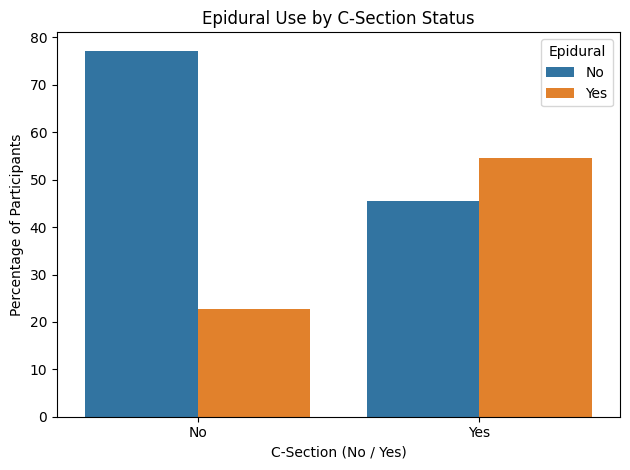

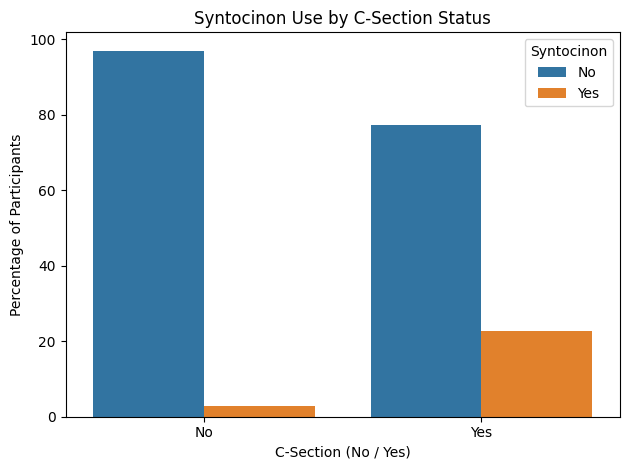

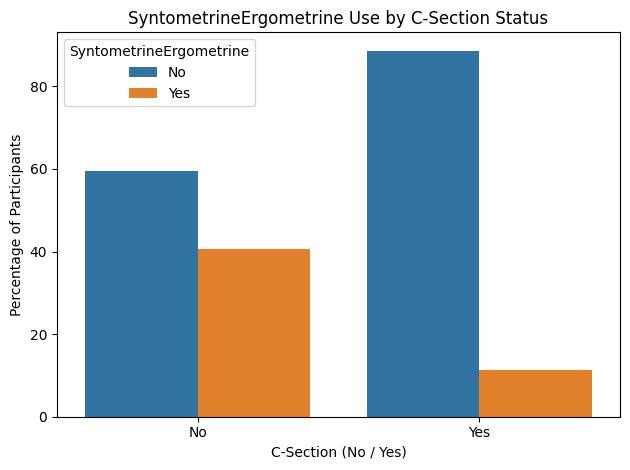

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plot_vars = ['Epidural', 'Syntocinon', 'SyntometrineErgometrine']
for var in plot_vars:
    prop = (
        pd.crosstab(df['Csection'], df[var], normalize='index') * 100
    ).reset_index().melt(id_vars='Csection', value_name='Percent', var_name=var+'_Response')

    sns.barplot(x='Csection', y='Percent', hue=var+'_Response', data=prop)
    plt.title(f'{var} Use by C-Section Status')
    plt.ylabel('Percentage of Participants')
    plt.xlabel('C-Section (No / Yes)')
    plt.legend(title=var)
    plt.tight_layout()
    plt.show()


In [103]:
df

,Participant ID,baseline_date,baselinesampletime,baseline_medications,maternal_height,maternal_weight,prepreg BMI,baseline_comorbidities_685,deliverydate,delivery_time,...,Comorbidity_2,Comorbidity_3,gestagebirth_weeks,deliverymeds_1,deliverymeds_2,deliverymeds_3,deliverymeds_4,regularPN_med_clean,baseline_pregdetails,delivery_datetime
0,LAC0218,2023-06-09,10:00,NaN,1.65,57.80,21.23,No,2023-08-07,15:41:00,...,NaN,NaN,40.428571,Induction or augmentation of labour with oxytocin,NaN,NaN,NaN,Fragmin (dalteparin),36.285714,2023-08-07 15:41:00
1,LAC0221,NaT,11:20,Diet controlled,1.60,49.00,19.14,Yes,2023-08-08,13:09:00,...,NaN,NaN,39.714286,Epidural,NaN,NaN,NaN,Fragmin (dalteparin),32.571429,2023-08-08 13:09:00
2,LAC0228,NaT,12:50,Omeprazole 20mg,1.64,78.80,29.30,No,2023-05-09,10:01:00,...,NaN,NaN,41.428571,Induction or augmentation of labour with oxytocin,Epidural,NaN,NaN,NaN,32.428571,2023-05-09 10:01:00
3,LAC0229,NaT,11:00,NaN,1.62,64.00,24.39,No,NaT,09:51:00,...,NaN,NaN,41.571429,Unknown,NaN,NaN,NaN,NaN,36.285714,NaT
4,LAC0230,NaT,11:27,NaN,1.63,55.00,20.70,No,NaT,06:06:00,...,NaN,NaN,41.857143,Epidural,NaN,NaN,NaN,Fragmin (dalteparin),36.000000,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,LAC0459,NaT,11:10,NaN,1.68,55.00,19.49,No,2025-09-02,00:59:00,...,NaN,NaN,42.285714,Induction or augmentation of labour with oxytocin,NaN,NaN,NaN,NaN,39.000000,2025-09-02 00:59:00
141,LAC0460,NaT,12:10,Vit D,1.65,57.60,21.16,No,2025-10-02,16:37:00,...,NaN,NaN,39.142857,Epidural,NaN,NaN,NaN,NaN,36.142857,2025-10-02 16:37:00
142,LAC0462,NaT,11:10,Fragmin\nMetformin\nAspirin\nLantus\nAspirin\n...,1.68,99.00,35.08,Yes,NaT,09:35:00,...,NaN,NaN,39.000000,Diamorphine,Antiemetics,Other,NaN,Fragmin (dalteparin),35.857143,NaT
143,LAC0469,NaT,11:45,Levothyroxine 50mg OD you,1.68,77.65,27.51,Yes,NaT,09:17:00,...,NaN,NaN,42.000000,Other,NaN,NaN,NaN,NaN,31.857143,NaT


In [109]:
infant_vars = ['Infant_sepsis', 'SGA', 'neonatalobs']
for var in infant_vars:
    if df[var].dtype == 'object':
        table = pd.crosstab(df[var], df['Parity'])
        chi2, p, dof, expected = chi2_contingency(table)
        print(f"{var}: p = {p:.4f}")
    else:
        model = ols(f"{var} ~ C(Delivery Method)", data=df).fit()
        anova = sm.stats.anova_lm(model, typ=2)
        print(f"\nANOVA for {var}:\n", anova)


Infant_sepsis: p = 0.9882
SGA: p = 0.0002
neonatalobs: p = 0.8507


In [112]:
print(df['SGA'].value_counts(dropna=False))
df['SGA'].dtype

SGA
No     134
Yes      8
NaN      3
Name: count, dtype: int64


dtype('O')

In [114]:
df['SGA_numeric'] = df['SGA'].map({'No': 0, 'Yes': 1})

In [115]:
print(df[['SGA', 'SGA_numeric']].head())
print(df['SGA_numeric'].dtype)


  SGA  SGA_numeric
0  No          0.0
1  No          0.0
2  No          0.0
3  No          0.0
4  No          0.0
float64


In [117]:
model = ols('SGA_numeric ~ C(Parity)', data=df).fit()
anova = sm.stats.anova_lm(model, typ=2)
print(anova)

             sum_sq     df         F    PR(>F)
C(Parity)  1.051205    3.0  7.290624  0.000144
Residual   6.488364  135.0       NaN       NaN


In [131]:
table = pd.crosstab(df['SGA'], df['Primiparity'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2 = {chi2:.3f}, p = {p:.4f}")

Chi2 = 1.919, p = 0.1659


In [130]:
df['Primiparity'].value_counts()

Primiparity
No     82
Yes    63
Name: count, dtype: int64

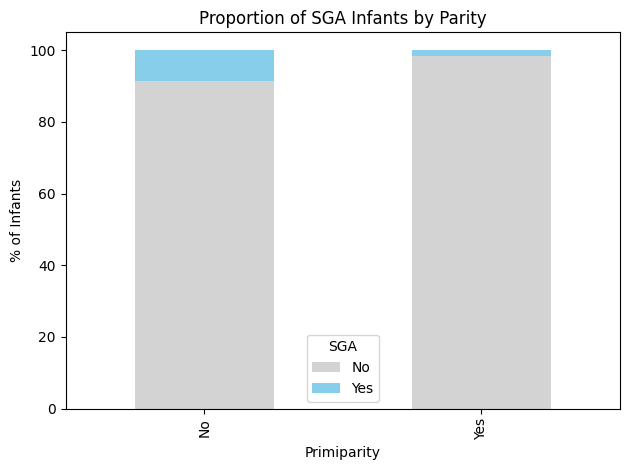

In [129]:
prop = pd.crosstab(df['Primiparity'], df['SGA'], normalize='index') * 100
prop.plot(kind='bar', stacked=True, color=['lightgray', 'skyblue'])
plt.ylabel('% of Infants')
plt.title('Proportion of SGA Infants by Parity')
plt.legend(title='SGA')
plt.tight_layout()
plt.show()


In [133]:
df_all = pd.read_excel('Cleaned Data/Merged/merged_hmo_meta.xlsx')
df_all

,Sample Name,Participant ID,PP day,secretor_status,Diversity,Evenness,2FL (µg/mL),3FL (µg/mL),DFLac (µg/mL),3SL (µg/mL),...,Comorbidity_2,Comorbidity_3,gestagebirth_weeks,deliverymeds_1,deliverymeds_2,deliverymeds_3,deliverymeds_4,regularPN_med_clean,baseline_pregdetails,delivery_datetime
0,219,LAC0218,Day 4,0,5.017169,0.264062,173.672716,714.121322,5.398712,144.627013,...,NaN,NaN,40.428571,Induction or augmentation of labour with oxytocin,NaN,NaN,NaN,Fragmin (dalteparin),36.285714,2023-08-07 15:41:00
1,110,LAC0221,Day 2,1,3.016376,0.158757,5480.348541,414.010218,576.402554,491.994795,...,NaN,NaN,39.714286,Epidural,NaN,NaN,NaN,Fragmin (dalteparin),32.571429,2023-08-08 13:09:00
2,169,LAC0221,Day 3,1,3.438544,0.180976,3998.863285,265.639680,323.469276,139.391900,...,NaN,NaN,39.714286,Epidural,NaN,NaN,NaN,Fragmin (dalteparin),32.571429,2023-08-08 13:09:00
3,80,LAC0228,Day 1,1,2.655082,0.139741,5820.568398,650.882342,1994.705797,359.449039,...,NaN,NaN,41.428571,Induction or augmentation of labour with oxytocin,Epidural,NaN,NaN,NaN,32.428571,2023-05-09 10:01:00
4,171,LAC0228,Day 3,1,3.212779,0.169094,4270.696505,187.577112,174.143382,125.529140,...,NaN,NaN,41.428571,Induction or augmentation of labour with oxytocin,Epidural,NaN,NaN,NaN,32.428571,2023-05-09 10:01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,385,LAC0469,Day 3,1,4.364350,0.229703,3628.924909,459.234480,392.470493,436.989910,...,NaN,NaN,42.000000,Other,NaN,NaN,NaN,NaN,31.857143,NaT
305,386,LAC0469,Day 4,1,5.667015,0.298264,2486.851527,341.023394,197.294414,177.458203,...,NaN,NaN,42.000000,Other,NaN,NaN,NaN,NaN,31.857143,NaT
306,387,LAC0469,Day 5,1,6.179823,0.325254,2602.790047,380.160435,227.099420,259.315542,...,NaN,NaN,42.000000,Other,NaN,NaN,NaN,NaN,31.857143,NaT
307,388,LAC0481,Day 3,1,2.861894,0.150626,5830.518756,279.258489,632.406649,447.895941,...,NaN,NaN,38.428571,NaN,NaN,NaN,NaN,NaN,37.428571,NaT


In [165]:
hmo = pd.read_excel('Cleaned Data/HMO/hmo_data_oxford.xlsx')
hmo

,Sample Name,Participant ID,PP day,secretor_status,Diversity,Evenness,2FL (µg/mL),3FL (µg/mL),DFLac (µg/mL),3SL (µg/mL),...,DFLNT (%),LNH (%),DSLNT (%),FLNH (%),DFLNH (%),FDSLNH (%),DSLNH (%),SUM (%),unique_sample_id,PP_day_num
0,219,LAC0218,Day 4,0,5.017169,0.264062,173.672716,714.121322,5.398712,144.627013,...,2.256882,1.151817,2.509531,1.511975,3.154562,0.896466,1.027294,100.0,LAC0218_day4,4
1,110,LAC0221,Day 2,1,3.016376,0.158757,5480.348541,414.010218,576.402554,491.994795,...,4.616942,0.407322,1.484937,0.334749,0.512270,0.456914,1.008464,100.0,LAC0221_day2,2
2,169,LAC0221,Day 3,1,3.438544,0.180976,3998.863285,265.639680,323.469276,139.391900,...,5.432946,0.480734,1.318225,0.716340,0.410192,0.409398,0.785703,100.0,LAC0221_day3,3
3,80,LAC0228,Day 1,1,2.655082,0.139741,5820.568398,650.882342,1994.705797,359.449039,...,2.589544,0.372483,0.718322,0.282532,0.374279,0.402692,0.726981,100.0,LAC0228_day1,1
4,171,LAC0228,Day 3,1,3.212779,0.169094,4270.696505,187.577112,174.143382,125.529140,...,3.396190,0.843448,1.346223,1.373897,0.201152,0.386176,0.486536,100.0,LAC0228_day3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,385,LAC0469,Day 3,1,4.364350,0.229703,3628.924909,459.234480,392.470493,436.989910,...,7.993378,0.709054,1.223659,0.732887,0.439573,0.401115,0.628473,100.0,LAC0469_day3,3
305,386,LAC0469,Day 4,1,5.667015,0.298264,2486.851527,341.023394,197.294414,177.458203,...,8.612977,1.059749,1.218534,1.441480,0.519961,0.632561,0.799139,100.0,LAC0469_day4,4
306,387,LAC0469,Day 5,1,6.179823,0.325254,2602.790047,380.160435,227.099420,259.315542,...,9.519035,1.068185,1.552390,1.352822,0.653799,0.579666,0.667565,100.0,LAC0469_day5,5
307,347,LAC0481,Day 4,1,3.402026,0.179054,4198.874387,230.807293,554.964737,326.731301,...,8.331920,0.760769,1.154483,0.719874,0.308186,0.307367,0.789750,100.0,LAC0481_day4,4


In [146]:
hmo['PP_day_num'].value_counts()

PP_day_num
4    79
3    67
2    55
5    48
1    34
6    26
Name: count, dtype: int64

In [152]:
hmo['Participant ID'].nunique()

145

In [151]:
from scipy.stats import ttest_ind, ttest_rel

# --- pick HMO columns (those that contain "µg/mL") ---
hmo_ug_cols = [c for c in hmo.columns if 'µg/mL' in c]

# --- define groups ---
colostrum_days = [1, 2, 3, 4, 5]
mature_day = 6

# ============ Paired t-test: same participant has both stages (recommended) ============
# use a single colostrum value per participant (e.g., mean across days 1–5)
colostrum = (
    hmo[hmo['PP_day_num'].isin(colostrum_days)]
      .groupby('Participant ID')[hmo_ug_cols].mean()
)
mature = (
    hmo[hmo['PP_day_num'] == mature_day]
      .groupby('Participant ID')[hmo_ug_cols].mean()
)

paired = colostrum.join(mature, how='inner', lsuffix='_col', rsuffix='_mat')

print('\nPaired t-test (within-participant):')
for col in hmo_ug_cols:
    a = paired[f'{col}_col'].dropna()
    b = paired[f'{col}_mat'].dropna()
    # align after dropna
    idx = a.index.intersection(b.index)
    a, b = a.loc[idx], b.loc[idx]
    if len(idx) >= 2:
        stat, p = ttest_rel(a, b)
        print(f"{col}: n={len(idx)} | col_mean={a.mean():.2f} | mat_mean={b.mean():.2f} | p={p:.4g}")
    else:
        print(f"{col}: not enough paired data (n={len(idx)})")


Paired t-test (within-participant):
2FL (µg/mL): n=23 | col_mean=2109.25 | mat_mean=1430.88 | p=0.0004137
3FL (µg/mL): n=23 | col_mean=396.10 | mat_mean=663.43 | p=2.706e-05
DFLac (µg/mL): n=23 | col_mean=183.53 | mat_mean=177.16 | p=0.9312
3SL (µg/mL): n=23 | col_mean=184.12 | mat_mean=165.49 | p=0.7308
6SL (µg/mL): n=23 | col_mean=464.55 | mat_mean=371.09 | p=0.0008118
LNT (µg/mL): n=23 | col_mean=1226.15 | mat_mean=1046.18 | p=0.1723
LNnT (µg/mL): n=23 | col_mean=271.01 | mat_mean=113.86 | p=1.884e-08
LNFP I (µg/mL): n=23 | col_mean=1093.54 | mat_mean=637.87 | p=0.0001062
LNFP II (µg/mL): n=23 | col_mean=787.61 | mat_mean=752.96 | p=0.5622
LNFP III (µg/mL): n=23 | col_mean=55.90 | mat_mean=20.77 | p=3.536e-07
LSTb (µg/mL): n=23 | col_mean=105.33 | mat_mean=92.33 | p=0.4355
LSTc (µg/mL): n=23 | col_mean=578.11 | mat_mean=164.39 | p=4.081e-10
DFLNT (µg/mL): n=23 | col_mean=805.21 | mat_mean=729.54 | p=0.4198
LNH (µg/mL): n=23 | col_mean=175.38 | mat_mean=131.38 | p=0.001091
DSLNT (µg

In [154]:
import numpy as np
import pandas as pd
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_rel

results = []
for col in hmo_ug_cols:
    a = paired[f'{col}_col'].dropna()
    b = paired[f'{col}_mat'].dropna()
    idx = a.index.intersection(b.index)
    a, b = a.loc[idx], b.loc[idx]
    if len(idx) >= 2:
        stat, p = ttest_rel(a, b)
        # effect size (paired): dz = mean(diff) / std(diff)
        diff = b - a
        dz = diff.mean() / diff.std(ddof=1)
        l2fc = np.log2((b.mean()+1e-9)/(a.mean()+1e-9))
        results.append([col, len(idx), a.mean(), b.mean(), l2fc, dz, p])

res = pd.DataFrame(results, columns=['HMO','n','col_mean','mat_mean','log2FC','dz','p'])
res['direction'] = np.where(res['log2FC']>0,'↑ mature','↓ mature')
res['p_adj'] = multipletests(res['p'], method='fdr_bh')[1]
res.sort_values('p_adj', inplace=True)
res[['HMO','n','col_mean','mat_mean','log2FC','dz','p','p_adj','direction']]


,HMO,n,col_mean,mat_mean,log2FC,dz,p,p_adj,direction
11,LSTc (µg/mL),23,578.111271,164.392147,-1.814206,-2.211928,4.080571e-10,8.161141e-09,↓ mature
6,LNnT (µg/mL),23,271.006113,113.861363,-1.251047,-1.784984,1.883873e-08,1.883873e-07,↓ mature
9,LNFP III (µg/mL),23,55.895239,20.774639,-1.427902,-1.492988,3.535876e-07,2.357250e-06,↓ mature
1,3FL (µg/mL),23,396.103515,663.433632,0.744075,1.100164,2.706160e-05,1.353080e-04,↑ mature
17,FDSLNH (µg/mL),23,219.134083,443.156880,1.016004,1.077670,3.508145e-05,1.403258e-04,↑ mature
7,LNFP I (µg/mL),23,1093.535120,637.867192,-0.777672,-0.982430,1.061623e-04,3.538743e-04,↓ mature
0,2FL (µg/mL),23,2109.252604,1430.876718,-0.559833,-0.866275,4.137068e-04,1.182019e-03,↓ mature
4,6SL (µg/mL),23,464.546472,371.088522,-0.324060,-0.808617,8.117578e-04,1.803906e-03,↓ mature
15,FLNH (µg/mL),23,286.600714,395.650717,0.465185,0.816461,7.407740e-04,1.803906e-03,↑ mature
13,LNH (µg/mL),23,175.382808,131.376473,-0.416800,-0.783204,1.091257e-03,1.984104e-03,↓ mature


In [157]:
from scipy.stats import ttest_ind

colostrum_days = [1,2,3,4,5]
mature_day = 6

print('\nWelch t-test (independent, all participants):')
for col in hmo_ug_cols:
    col_vals = hmo.loc[hmo['PP_day_num'].isin(colostrum_days), col].dropna()
    mat_vals = hmo.loc[hmo['PP_day_num']==mature_day, col].dropna()
    if len(col_vals) >= 2 and len(mat_vals) >= 2:
        stat, p = ttest_ind(col_vals, mat_vals, equal_var=False)
        print(f"{col}: n_col={len(col_vals)} | n_mat={len(mat_vals)} | "
              f"col_mean={col_vals.mean():.2f} | mat_mean={mat_vals.mean():.2f} | p={p:.4g}")
    else:
        print(f"{col}: not enough data (col={len(col_vals)}, mat={len(mat_vals)})")




Welch t-test (independent, all participants):
2FL (µg/mL): n_col=283 | n_mat=26 | col_mean=3096.13 | mat_mean=1373.75 | p=3.576e-08
3FL (µg/mL): n_col=283 | n_mat=26 | col_mean=484.70 | mat_mean=725.40 | p=0.02927
DFLac (µg/mL): n_col=283 | n_mat=26 | col_mean=437.85 | mat_mean=160.45 | p=0.0005557
3SL (µg/mL): n_col=283 | n_mat=26 | col_mean=242.01 | mat_mean=159.76 | p=0.08218
6SL (µg/mL): n_col=283 | n_mat=26 | col_mean=429.23 | mat_mean=377.50 | p=0.04558
LNT (µg/mL): n_col=283 | n_mat=26 | col_mean=1036.45 | mat_mean=1106.29 | p=0.5515
LNnT (µg/mL): n_col=283 | n_mat=26 | col_mean=268.26 | mat_mean=114.73 | p=1.919e-12
LNFP I (µg/mL): n_col=283 | n_mat=26 | col_mean=1306.81 | mat_mean=664.29 | p=3.849e-05
LNFP II (µg/mL): n_col=283 | n_mat=26 | col_mean=748.68 | mat_mean=844.78 | p=0.4238
LNFP III (µg/mL): n_col=283 | n_mat=26 | col_mean=64.43 | mat_mean=21.21 | p=6.496e-33
LSTb (µg/mL): n_col=283 | n_mat=26 | col_mean=125.93 | mat_mean=97.70 | p=0.04338
LSTc (µg/mL): n_col=283 |

In [159]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, ttest_rel
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Setup ----
colostrum_days = [1, 2, 3, 4, 5]
mature_day = 6

# ---- Identify HMO columns ----
hmo_ug_cols = [c for c in hmo.columns if '(µg/mL)' in c]

# ---- Independent t-tests (all participants) ----
independent_results = []
for col in hmo_ug_cols:
    col_vals = hmo.loc[hmo['PP_day_num'].isin(colostrum_days), col].dropna()
    mat_vals = hmo.loc[hmo['PP_day_num'] == mature_day, col].dropna()
    if len(col_vals) >= 2 and len(mat_vals) >= 2:
        stat, p = ttest_ind(col_vals, mat_vals, equal_var=False)
        log2fc = np.log2((mat_vals.mean() + 1e-9) / (col_vals.mean() + 1e-9))
        independent_results.append([col, col_vals.mean(), mat_vals.mean(), log2fc, p])

independent_df = pd.DataFrame(independent_results,
                              columns=['HMO','col_mean','mat_mean','log2FC','p'])
independent_df['analysis'] = 'Independent'

# Adjust p-values (FDR)
independent_df['p_adj'] = multipletests(independent_df['p'], method='fdr_bh')[1]

# ---- Paired t-tests (within participant) ----
paired_results = []
for col in hmo_ug_cols:
    a = paired[f'{col}_col'].dropna()
    b = paired[f'{col}_mat'].dropna()
    idx = a.index.intersection(b.index)
    a, b = a.loc[idx], b.loc[idx]
    if len(idx) >= 2:
        stat, p = ttest_rel(a, b)
        log2fc = np.log2((b.mean() + 1e-9) / (a.mean() + 1e-9))
        paired_results.append([col, a.mean(), b.mean(), log2fc, p])

paired_df = pd.DataFrame(paired_results,
                         columns=['HMO','col_mean','mat_mean','log2FC','p'])
paired_df['analysis'] = 'Paired'
paired_df['p_adj'] = multipletests(paired_df['p'], method='fdr_bh')[1]

# Combine
results_df = pd.concat([independent_df, paired_df])
results_df['direction'] = np.where(results_df['log2FC'] > 0, '↑ Mature', '↓ Colostrum')
results_df['-log10(p_adj)'] = -np.log10(results_df['p_adj'])
results_df.head()


,HMO,col_mean,mat_mean,log2FC,p,analysis,p_adj,direction,-log10(p_adj)
0,2FL (µg/mL),3096.127157,1373.748243,-1.172347,3.575669e-08,Independent,1.787834e-07,↓ Colostrum,6.747673
1,3FL (µg/mL),484.697563,725.396726,0.581685,2.926738e-02,Independent,4.877897e-02,↑ Mature,1.311767
2,DFLac (µg/mL),437.847124,160.448221,-1.448319,5.557094e-04,Independent,1.234910e-03,↓ Colostrum,2.908365
3,3SL (µg/mL),242.006798,159.761528,-0.599128,8.218169e-02,Independent,1.027271e-01,↓ Colostrum,0.988315
4,6SL (µg/mL),429.231689,377.500899,-0.185277,4.558426e-02,Independent,6.077901e-02,↓ Colostrum,1.216246


/var/folders/c8/_21cxjf54_5d0qsx2dqt5qgc0000gp/T/ipykernel_50567/2817711117.py:18: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/c8/_21cxjf54_5d0qsx2dqt5qgc0000gp/T/ipykernel_50567/2817711117.py:18: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/c8/_21cxjf54_5d0qsx2dqt5qgc0000gp/T/ipykernel_50567/2817711117.py:18: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/kspann/.hmo-kernel/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kspann/.hmo-kernel/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kspann/.hmo-kernel/lib/python3.13/site-packages/IPython/core/p

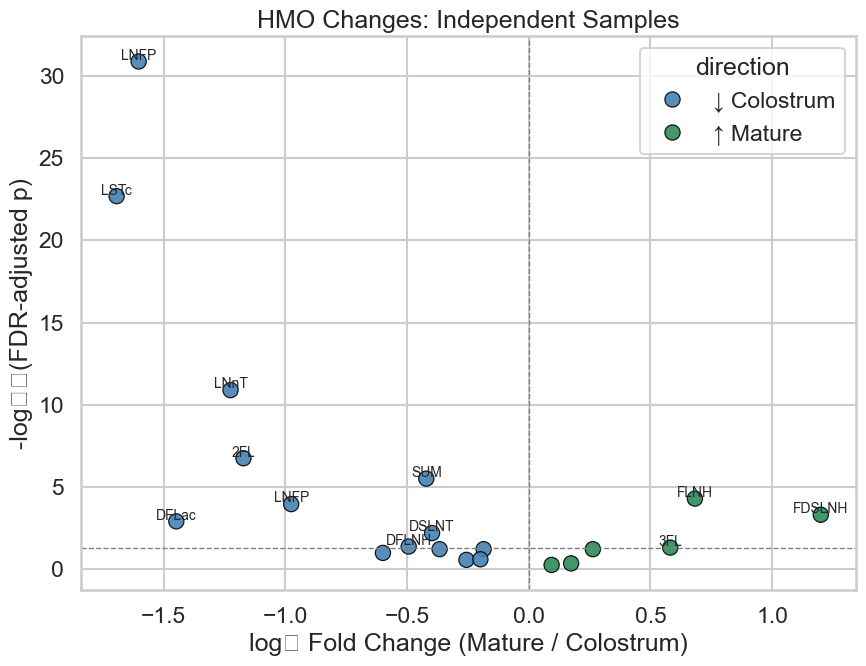

/var/folders/c8/_21cxjf54_5d0qsx2dqt5qgc0000gp/T/ipykernel_50567/2817711117.py:18: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/c8/_21cxjf54_5d0qsx2dqt5qgc0000gp/T/ipykernel_50567/2817711117.py:18: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/c8/_21cxjf54_5d0qsx2dqt5qgc0000gp/T/ipykernel_50567/2817711117.py:18: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/kspann/.hmo-kernel/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kspann/.hmo-kernel/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kspann/.hmo-kernel/lib/python3.13/site-packages/IPython/core/p

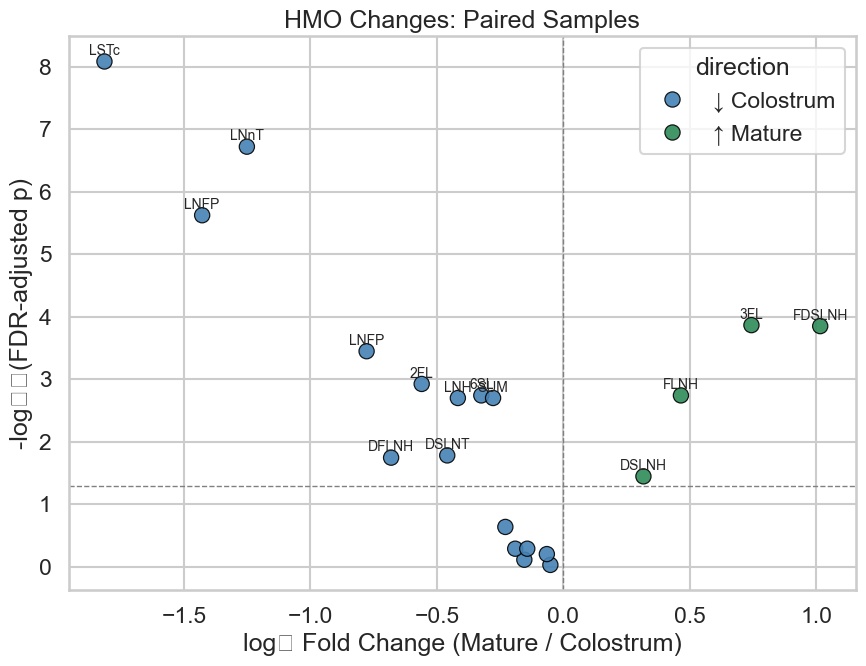

In [160]:
sns.set(style='whitegrid', context='talk')

for analysis in ['Independent', 'Paired']:
    subset = results_df[results_df['analysis'] == analysis]
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=subset,
                    x='log2FC', y='-log10(p_adj)',
                    hue='direction', palette={'↑ Mature':'#2E8B57','↓ Colostrum':'#4682B4'},
                    s=120, edgecolor='black', alpha=0.9)
    plt.axhline(-np.log10(0.05), color='gray', linestyle='--', lw=1)
    plt.axvline(0, color='gray', linestyle='--', lw=1)
    plt.title(f'HMO Changes: {analysis} Samples')
    plt.xlabel('log₂ Fold Change (Mature / Colostrum)')
    plt.ylabel('-log₁₀(FDR-adjusted p)')
    for _, row in subset[subset['p_adj'] < 0.05].iterrows():
        plt.text(row['log2FC'], row['-log10(p_adj)']+0.1,
                 row['HMO'].split(' ')[0], fontsize=10, ha='center')
    plt.tight_layout()
    plt.show()


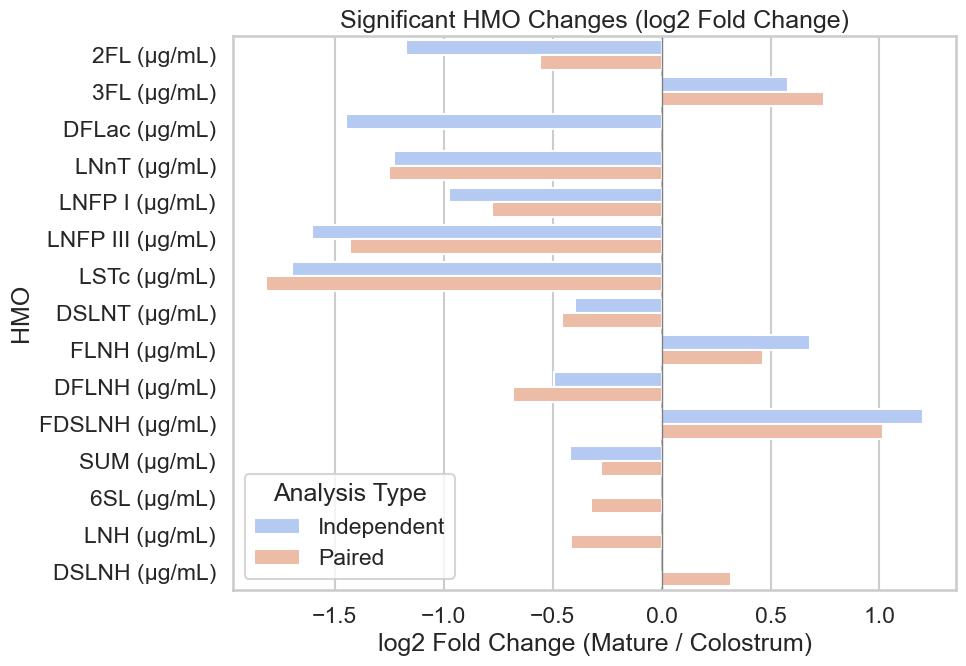

In [162]:
sig_df = results_df[results_df['p_adj'] < 0.05]

plt.figure(figsize=(10,7))
sns.barplot(data=sig_df, x='log2FC', y='HMO', hue='analysis',
            palette='coolwarm', orient='h')
plt.axvline(0, color='gray', lw=1)
plt.title('Significant HMO Changes (log2 Fold Change)')
plt.xlabel('log2 Fold Change (Mature / Colostrum)')
plt.ylabel('HMO')
plt.legend(title='Analysis Type')
plt.tight_layout()
plt.show()


In [168]:
df_all['Csection'].value_counts()

Csection
No     207
Yes    102
Name: count, dtype: int64

In [167]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import pandas as pd
import numpy as np

# --- subset ---
colostrum_days = [1,2,3,4,5]
mature_day = 6
hmo_ug_cols = [c for c in df_all.columns if '(µg/mL)' in c]

# Only keep mature milk for delivery method comparisons (to avoid stage confounding)
mature = df_all[df_all['PP_day_num'] == mature_day].copy()

# Check sample size per group
print(mature['Csection'].value_counts())

# --- Independent t-tests for each HMO ---
results = []
for col in hmo_ug_cols:
    group1 = mature.loc[mature['Csection'] == 'Yes', col].dropna()
    group2 = mature.loc[mature['Csection'] == 'No', col].dropna()
    if len(group1) >= 2 and len(group2) >= 2:
        stat, p = ttest_ind(group1, group2, equal_var=False)
        log2fc = np.log2((group1.mean() + 1e-9) / (group2.mean() + 1e-9))
        results.append([col, len(group1), len(group2),
                        group1.mean(), group2.mean(), log2fc, p])

# Convert to dataframe
res_df = pd.DataFrame(results, columns=['HMO','n_Csec','n_Vaginal','Csec_mean','Vag_mean','log2FC','p'])

# FDR correction
res_df['p_adj'] = multipletests(res_df['p'], method='fdr_bh')[1]
res_df['direction'] = np.where(res_df['log2FC'] > 0, '↑ C-section', '↓ C-section')

res_df.sort_values('p_adj', inplace=True)
res_df[['HMO','Csec_mean','Vag_mean','log2FC','p','p_adj','direction']]


Csection
No     17
Yes     9
Name: count, dtype: int64


,HMO,Csec_mean,Vag_mean,log2FC,p,p_adj,direction
19,SUM (µg/mL),7501.319712,8537.347389,-0.186643,0.181287,0.666095,↓ C-section
2,DFLac (µg/mL),68.576217,209.086340,-1.608319,0.172538,0.666095,↓ C-section
3,3SL (µg/mL),101.422922,190.646673,-0.910518,0.199829,0.666095,↓ C-section
12,DFLNT (µg/mL),510.119048,822.204971,-0.688664,0.166216,0.666095,↓ C-section
11,LSTc (µg/mL),136.576138,184.067800,-0.430532,0.147620,0.666095,↓ C-section
10,LSTb (µg/mL),77.921091,108.169027,-0.473202,0.162515,0.666095,↓ C-section
15,FLNH (µg/mL),444.976792,389.190532,0.193253,0.319017,0.708927,↑ C-section
14,DSLNT (µg/mL),201.390234,251.185389,-0.318759,0.252333,0.708927,↓ C-section
6,LNnT (µg/mL),98.712419,123.203308,-0.319737,0.318442,0.708927,↓ C-section
17,FDSLNH (µg/mL),541.365393,437.244307,0.308163,0.452883,0.803384,↑ C-section


In [169]:
# Get the first recorded day per participant
first_sample = (
    df_all.groupby('Participant ID', as_index=False)['PP_day_num']
       .min()
       .rename(columns={'PP_day_num': 'first_sample_day'})
)

# Merge with C-section info (from metadata or HMO)
first_sample = first_sample.merge(
    df_all[['Participant ID', 'Csection']].drop_duplicates(),
    on='Participant ID',
    how='left'
)
print(first_sample.head())

  Participant ID  first_sample_day Csection
0        LAC0218                 4       No
1        LAC0221                 2      Yes
2        LAC0228                 1      Yes
3        LAC0229                 3       No
4        LAC0230                 2      Yes


In [170]:

group_yes = first_sample.loc[first_sample['Csection'] == 'Yes', 'first_sample_day']
group_no  = first_sample.loc[first_sample['Csection'] == 'No', 'first_sample_day']

stat, p = ttest_ind(group_yes, group_no, equal_var=False)
print(f"C-section mean = {group_yes.mean():.2f}, Vaginal mean = {group_no.mean():.2f}")
print(f"t = {stat:.3f}, p = {p:.4f}")


C-section mean = 2.48, Vaginal mean = 2.69
t = -0.977, p = 0.3314


/var/folders/c8/_21cxjf54_5d0qsx2dqt5qgc0000gp/T/ipykernel_50567/2889853758.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Csection', y='first_sample_day', data=first_sample, palette='Set2')


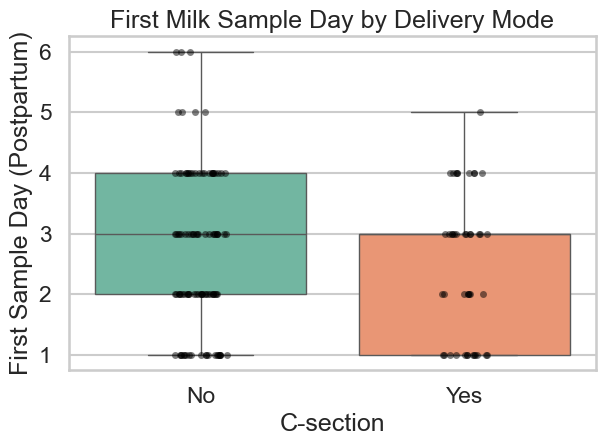

In [172]:
sns.boxplot(x='Csection', y='first_sample_day', data=first_sample, palette='Set2')
sns.stripplot(x='Csection', y='first_sample_day', data=first_sample, color='black', alpha=0.5)
plt.title('First Milk Sample Day by Delivery Mode')
plt.xlabel('C-section')
plt.ylabel('First Sample Day (Postpartum)')
plt.tight_layout()
plt.show()

In [173]:
from scipy.stats import shapiro

for group, values in first_sample.groupby('Csection')['first_sample_day']:
    stat, p = shapiro(values)
    print(f"{group}: W={stat:.3f}, p={p:.4f}")


No: W=0.908, p=0.0000
Yes: W=0.875, p=0.0002


In [176]:
u_stat, p = mannwhitneyu(
    first_sample.loc[first_sample['Csection']=='Yes', 'first_sample_day'],
    first_sample.loc[first_sample['Csection']=='No', 'first_sample_day'],
    alternative='two-sided'
)
print(f"Mann–Whitney U = {u_stat:.3f}, p = {p:.4f}")

Mann–Whitney U = 2046.000, p = 0.4379


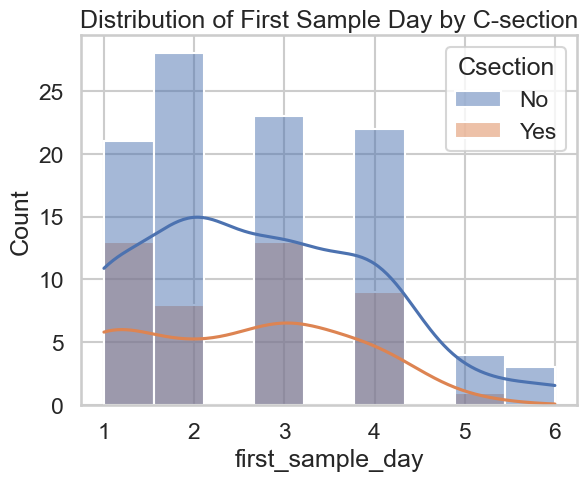

In [174]:
sns.histplot(data=first_sample, x='first_sample_day', hue='Csection', kde=True)
plt.title('Distribution of First Sample Day by C-section')
plt.show()


In [177]:
# Identify HMO columns
hmo_ug_cols = [c for c in df_all.columns if '(µg/mL)' in c]

# Quick check
print(df_all['Csection'].value_counts())

# --- T-tests (all samples) ---
results = []
for col in hmo_ug_cols:
    group_yes = df_all.loc[df_all['Csection'] == 'Yes', col].dropna()
    group_no  = df_all.loc[df_all['Csection'] == 'No', col].dropna()
    if len(group_yes) >= 2 and len(group_no) >= 2:
        stat, p = ttest_ind(group_yes, group_no, equal_var=False)
        log2fc = np.log2((group_yes.mean() + 1e-9) / (group_no.mean() + 1e-9))
        results.append([col, len(group_yes), len(group_no),
                        group_yes.mean(), group_no.mean(), log2fc, p])

# Build dataframe
res_df = pd.DataFrame(results, columns=['HMO','n_Csec','n_Vaginal','Csec_mean','Vag_mean','log2FC','p'])
res_df['p_adj'] = multipletests(res_df['p'], method='fdr_bh')[1]
res_df['direction'] = np.where(res_df['log2FC'] > 0, '↑ C-section', '↓ C-section')

res_df.sort_values('p_adj', inplace=True)
res_df.head(10)

Csection
No     207
Yes    102
Name: count, dtype: int64


,HMO,n_Csec,n_Vaginal,Csec_mean,Vag_mean,log2FC,p,p_adj,direction
15,FLNH (µg/mL),102,207,244.381409,278.775600,-0.189970,0.081804,0.383970,↓ C-section
6,LNnT (µg/mL),102,207,237.919328,263.929468,-0.149680,0.095992,0.383970,↓ C-section
13,LNH (µg/mL),102,207,140.969096,156.371344,-0.149597,0.072033,0.383970,↓ C-section
18,DSLNH (µg/mL),102,207,240.727523,263.199787,-0.128757,0.056543,0.383970,↓ C-section
10,LSTb (µg/mL),102,207,112.857958,128.831248,-0.190974,0.052065,0.383970,↓ C-section
17,FDSLNH (µg/mL),102,207,210.764753,237.177498,-0.170334,0.229015,0.711408,↓ C-section
3,3SL (µg/mL),102,207,216.341959,244.322917,-0.175476,0.248993,0.711408,↓ C-section
14,DSLNT (µg/mL),102,207,291.510054,306.989171,-0.074642,0.299284,0.748211,↓ C-section
5,LNT (µg/mL),102,207,975.319182,1075.346751,-0.140856,0.339196,0.753769,↓ C-section
9,LNFP III (µg/mL),102,207,59.328102,61.519199,-0.052321,0.567626,0.881609,↓ C-section


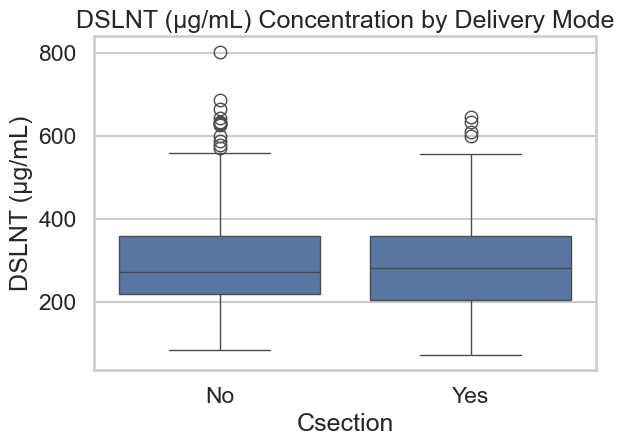

In [186]:
sns.boxplot(x='Csection', y='DSLNT (µg/mL)', data=df_all)
plt.title('DSLNT (µg/mL) Concentration by Delivery Mode')
plt.tight_layout()
plt.show()

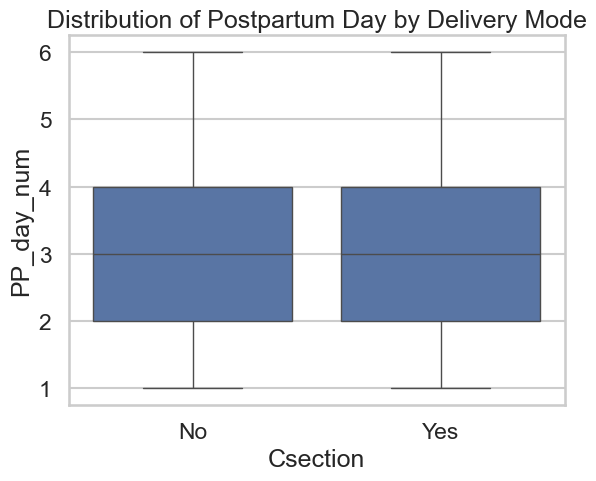

In [180]:
sns.boxplot(x='Csection', y='PP_day_num', data=df_all)
plt.title('Distribution of Postpartum Day by Delivery Mode')
plt.show()


/var/folders/c8/_21cxjf54_5d0qsx2dqt5qgc0000gp/T/ipykernel_50567/1490024162.py:12: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/c8/_21cxjf54_5d0qsx2dqt5qgc0000gp/T/ipykernel_50567/1490024162.py:12: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/c8/_21cxjf54_5d0qsx2dqt5qgc0000gp/T/ipykernel_50567/1490024162.py:12: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/kspann/.hmo-kernel/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kspann/.hmo-kernel/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kspann/.hmo-kernel/lib/python3.13/site-packages/IPython/core/p

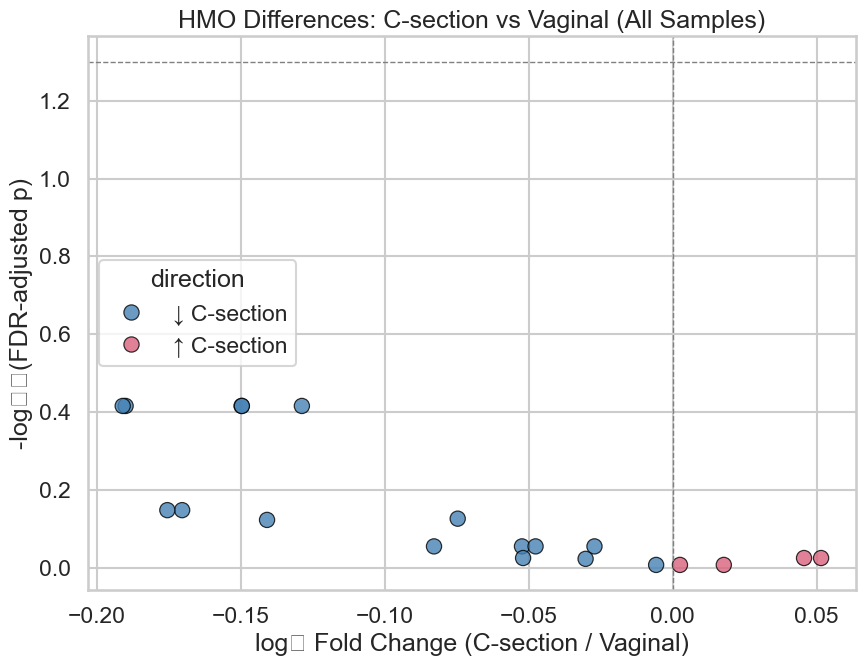

In [179]:
res_df['-log10(p_adj)'] = -np.log10(res_df['p_adj'])

plt.figure(figsize=(9,7))
sns.scatterplot(data=res_df, x='log2FC', y='-log10(p_adj)',
                hue='direction', s=120, edgecolor='black', alpha=0.8,
                palette={'↑ C-section':'#DA627D', '↓ C-section':'#4682B4'})
plt.axhline(-np.log10(0.05), color='gray', linestyle='--', lw=1)
plt.axvline(0, color='gray', linestyle='--', lw=1)
plt.title('HMO Differences: C-section vs Vaginal (All Samples)')
plt.xlabel('log₂ Fold Change (C-section / Vaginal)')
plt.ylabel('-log₁₀(FDR-adjusted p)')
plt.tight_layout()
plt.show()

In [194]:
df_all

,Sample Name,Participant ID,PP day,secretor_status,Diversity,Evenness,2FL (µg/mL),3FL (µg/mL),DFLac (µg/mL),3SL (µg/mL),...,Comorbidity_2,Comorbidity_3,gestagebirth_weeks,deliverymeds_1,deliverymeds_2,deliverymeds_3,deliverymeds_4,regularPN_med_clean,baseline_pregdetails,delivery_datetime
0,219,LAC0218,Day 4,0,5.017169,0.264062,173.672716,714.121322,5.398712,144.627013,...,NaN,NaN,40.428571,Induction or augmentation of labour with oxytocin,NaN,NaN,NaN,Fragmin (dalteparin),36.285714,2023-08-07 15:41:00
1,110,LAC0221,Day 2,1,3.016376,0.158757,5480.348541,414.010218,576.402554,491.994795,...,NaN,NaN,39.714286,Epidural,NaN,NaN,NaN,Fragmin (dalteparin),32.571429,2023-08-08 13:09:00
2,169,LAC0221,Day 3,1,3.438544,0.180976,3998.863285,265.639680,323.469276,139.391900,...,NaN,NaN,39.714286,Epidural,NaN,NaN,NaN,Fragmin (dalteparin),32.571429,2023-08-08 13:09:00
3,80,LAC0228,Day 1,1,2.655082,0.139741,5820.568398,650.882342,1994.705797,359.449039,...,NaN,NaN,41.428571,Induction or augmentation of labour with oxytocin,Epidural,NaN,NaN,NaN,32.428571,2023-05-09 10:01:00
4,171,LAC0228,Day 3,1,3.212779,0.169094,4270.696505,187.577112,174.143382,125.529140,...,NaN,NaN,41.428571,Induction or augmentation of labour with oxytocin,Epidural,NaN,NaN,NaN,32.428571,2023-05-09 10:01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,385,LAC0469,Day 3,1,4.364350,0.229703,3628.924909,459.234480,392.470493,436.989910,...,NaN,NaN,42.000000,Other,NaN,NaN,NaN,NaN,31.857143,NaT
305,386,LAC0469,Day 4,1,5.667015,0.298264,2486.851527,341.023394,197.294414,177.458203,...,NaN,NaN,42.000000,Other,NaN,NaN,NaN,NaN,31.857143,NaT
306,387,LAC0469,Day 5,1,6.179823,0.325254,2602.790047,380.160435,227.099420,259.315542,...,NaN,NaN,42.000000,Other,NaN,NaN,NaN,NaN,31.857143,NaT
307,388,LAC0481,Day 3,1,2.861894,0.150626,5830.518756,279.258489,632.406649,447.895941,...,NaN,NaN,38.428571,NaN,NaN,NaN,NaN,NaN,37.428571,NaT


Text(0.5, 1.0, 'Distribution of Estimated Blood Loss')

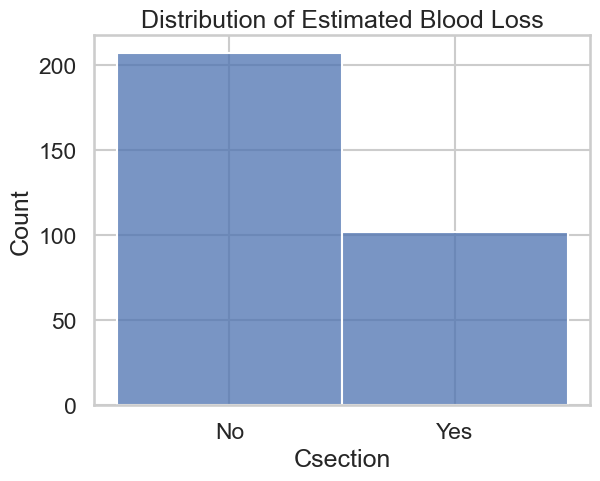

In [211]:
sns.histplot(df_all['Csection'], bins=20, kde=False)
plt.title('Distribution of Estimated Blood Loss')

Text(0.5, 1.0, 'Distribution of Estimated Blood Loss')

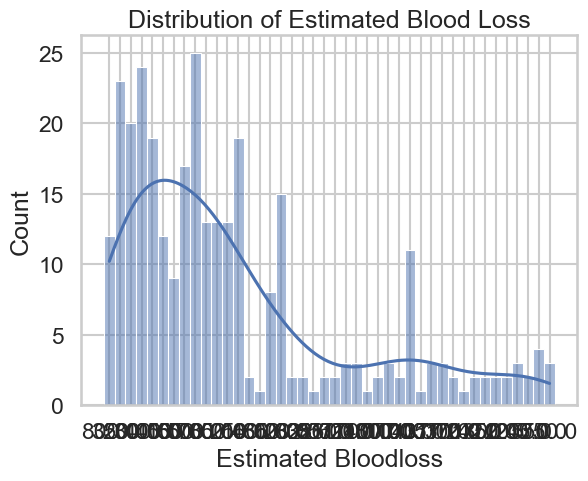

In [219]:
sns.histplot(df_all['Estimated Bloodloss'], bins=10, kde=True)
plt.title('Distribution of Estimated Blood Loss')

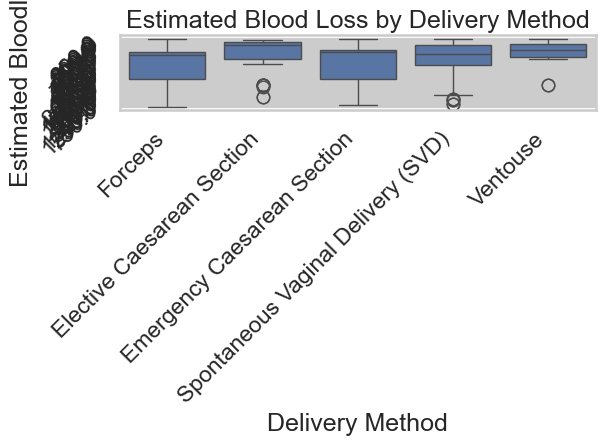

In [222]:
# Check distribution first
sns.boxplot(x='Delivery Method', y='Estimated Bloodloss', data=df_all)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.title('Estimated Blood Loss by Delivery Method')
plt.tight_layout()
plt.show()

In [ ]:
# If roughly normal
model = ols('Estimated Bloodloss ~ C(Delivery Method)', data=df_all).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# If skewed
groups = [group['Estimated Bloodloss'].dropna() for name, group in hmo.groupby('Delivery Method')]
stat, p = kruskal(*groups)
print(f"Kruskal–Wallis H={stat:.3f}, p={p:.4f}")

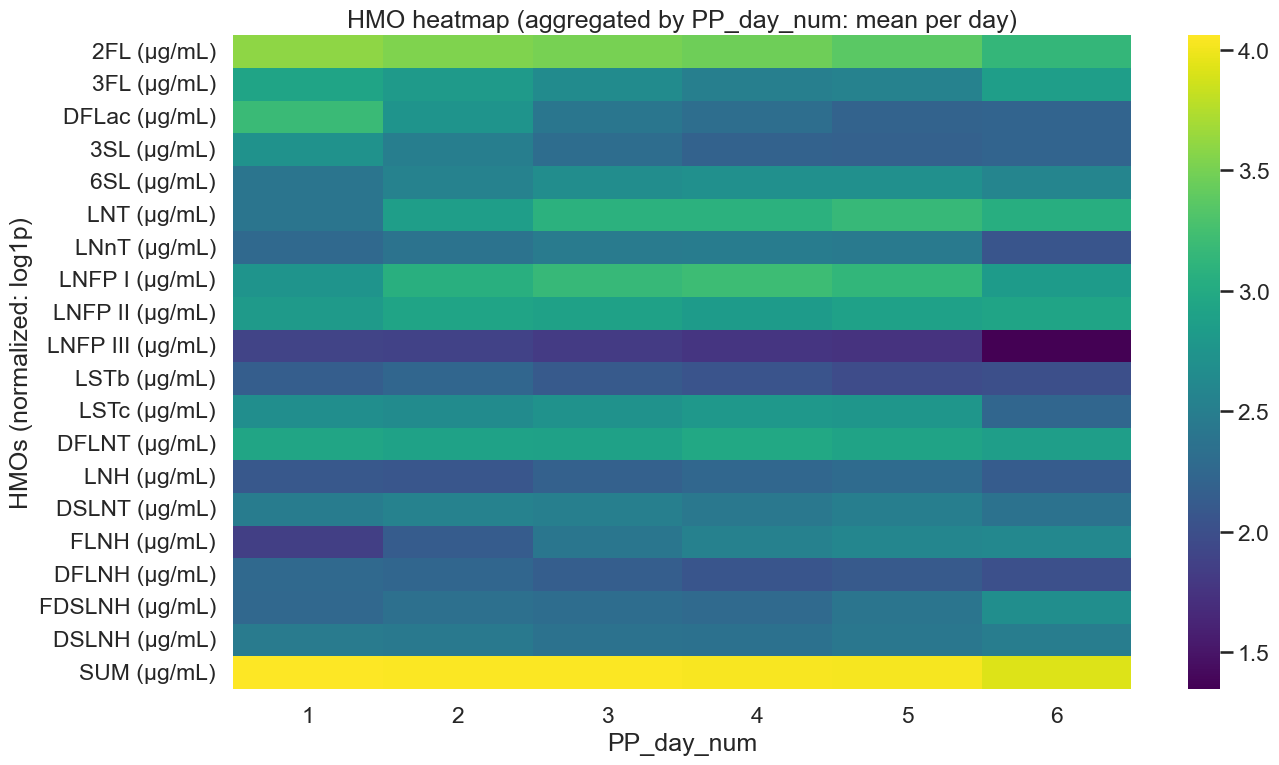

In [225]:
# --------------------
# 1) Column discovery
# --------------------
if "PP_day_num" not in hmo.columns:
    raise ValueError("Column 'PP_day_num' not found in `hmo`.")

hmo_cols = [c for c in hmo.columns if "(µg/mL)" in c]
if not hmo_cols:
    raise ValueError("No HMO columns found containing '(µg/mL)' in their name.")

# --------------------
# 2) Normalization (choose ONE)
#    set NORM to: "none", "log1p", or "zscore"
# --------------------
NORM = "log1p"  # "none" | "log1p" | "zscore"

def normalize(df):
    if NORM == "none":
        return df
    elif NORM == "log1p":
        # log10(x + 1)
        return np.log10(df + 1.0)
    elif NORM == "zscore":
        # column-wise z-score (per HMO across columns)
        return (df - df.mean(axis=1).values.reshape(-1, 1)) / (
            df.std(axis=1, ddof=0).replace(0, 1).values.reshape(-1, 1)
        )
    else:
        raise ValueError("NORM must be 'none', 'log1p', or 'zscore'.")

# ------------------------------------------------------------
# 3) DAY-LEVEL heatmap (columns = unique PP_day_num, values = mean per day)
# ------------------------------------------------------------
# aggregate to one column per day (mean across samples for that day)
day_means = (
    hmo_sorted.groupby("PP_day_num", as_index=True)[hmo_cols]
    .mean(numeric_only=True)
    .T  # rows = HMOs, cols = PP_day_num
    .sort_index(axis=1)  # sort days ascending
)

# same cleaning & normalization
day_means = day_means.replace([np.inf, -np.inf], np.nan)
day_means = day_means.apply(lambda r: r.fillna(r.median()), axis=1)
day_means_n = normalize(day_means)

plt.figure(figsize=(14, 8))
ax = sns.heatmap(day_means_n, cmap="viridis")
ax.set_title("HMO heatmap (aggregated by PP_day_num: mean per day)")
ax.set_xlabel("PP_day_num")
ax.set_ylabel("HMOs (µg/mL)" if NORM == "none" else f"HMOs (normalized: {NORM})")
plt.tight_layout()
plt.show()


In [241]:
# Ensure numeric day + an integer-rounded version (if needed)
hmo["PP_day_num"] = pd.to_numeric(hmo["PP_day_num"], errors="coerce")

colostrum_days = [1, 2, 3, 4, 5]
mature_day = 6
day_range = [1, 2, 3, 4, 5, 6]

# Use your same pairing idea: participants with ≥1 sample in 1–5 and ≥1 sample on 6
colostrum_ids = (
    hmo[hmo["PP_day_int"].isin(colostrum_days)]
    .groupby("Participant ID").size().index
)
mature_ids = (
    hmo[hmo["PP_day_int"].eq(mature_day)]
    .groupby("Participant ID").size().index
)
paired_ids = sorted(set(colostrum_ids) & set(mature_ids))
print(f"✅ Paired participants (have 1–5 & 6): {len(paired_ids)}")

# Subset to those participants and days 1–6
paired = hmo[(hmo["Participant ID"].isin(paired_ids)) & (hmo["PP_day_int"].isin(day_range))].copy()

# If you already have this from earlier:
# hmo_ug_cols = [c for c in hmo.columns if '(µg/mL)' in c]
assert len(hmo_ug_cols) > 0, "No HMO (µg/mL) columns found."


✅ Paired participants (have 1–5 & 6): 23


In [242]:
paired

,Sample Name,Participant ID,PP day,secretor_status,Diversity,Evenness,2FL (µg/mL),3FL (µg/mL),DFLac (µg/mL),3SL (µg/mL),...,LNH (%),DSLNT (%),FLNH (%),DFLNH (%),FDSLNH (%),DSLNH (%),SUM (%),unique_sample_id,PP_day_num,PP_day_int
205,159,LAC0392,Day 4,1,3.305524,0.173975,3900.103127,104.743226,56.279752,142.083790,...,0.922545,1.190735,2.148455,0.243789,0.366070,0.853789,100.0,LAC0392_day4,4,4
206,215,LAC0392,Day 3,1,2.891372,0.152177,4901.317163,170.452951,166.176223,209.646814,...,0.498516,1.161493,1.272233,0.194594,0.307494,0.793648,100.0,LAC0392_day3,3,3
207,315,LAC0392,Mature,1,3.939085,0.207320,2786.464718,126.932668,86.928405,101.876581,...,0.876363,1.846521,3.089014,0.227682,0.811997,1.728919,100.0,LAC0392_dayNA,6,6
209,278,LAC0395,Day 5,1,4.073391,0.214389,4575.327564,149.990799,225.681823,168.278557,...,0.868310,1.638521,1.306547,0.232029,0.258575,0.327772,100.0,LAC0395_day5,5,5
210,316,LAC0395,Mature,1,4.103538,0.215976,3973.798180,262.994181,168.372405,179.255187,...,1.050608,1.196629,1.826081,0.305110,0.472046,1.081499,100.0,LAC0395_dayNA,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,372,LAC0456,Mature,1,5.916988,0.311420,2133.410610,695.078472,175.484109,151.273412,...,0.687108,1.678894,2.612523,0.414758,2.013384,0.903044,100.0,LAC0456_dayNA,6,6
292,373,LAC0457,Day 3,0,6.778791,0.356778,165.670704,592.857858,3.218203,123.025246,...,1.936725,3.238493,3.518709,2.458441,1.965019,2.375065,100.0,LAC0457_day3,3,3
293,374,LAC0457,Day 4,0,6.009811,0.316306,157.906767,433.041470,2.044052,85.368668,...,1.991832,2.201586,6.833356,1.155075,3.048278,2.288320,100.0,LAC0457_day4,4,4
294,375,LAC0457,Day 5,0,7.225447,0.380287,151.187908,813.261458,2.960707,140.867323,...,2.023903,3.950793,3.208661,2.895880,1.830983,2.777534,100.0,LAC0457_day5,5,5


In [247]:
# Make sure PP_day_num is numeric
hmo["PP_day_num"] = pd.to_numeric(hmo["PP_day_num"], errors="coerce")

# Group by participant → list of unique days (sorted)
participant_days = (
    hmo.groupby("Participant ID")["PP_day_num"]
       .apply(lambda x: sorted(x.dropna().unique().astype(int).tolist()))
)

# Make a DataFrame with counts
participant_days_df = (
    participant_days.reset_index()
    .rename(columns={"PP_day_num": "Days Collected"})
)

# Add a column for how many unique days
participant_days_df["Num Days"] = participant_days_df["Days Collected"].apply(len)

# Sort by number of days descending
participant_days_df = participant_days_df.sort_values("Num Days", ascending=False).reset_index(drop=True)

# Display nicely
print(f"Total participants: {participant_days_df.shape[0]}")
display(participant_days_df.head(20))  # show first 20 row


Total participants: 145


,Participant ID,Days Collected,Num Days
0,LAC0237,"[1, 2, 3, 4, 5]",5
1,LAC0336,"[1, 2, 3, 4, 5]",5
2,LAC0432,"[3, 4, 5, 6]",4
3,LAC0383,"[2, 3, 4, 5]",4
4,LAC0423,"[3, 4, 5, 6]",4
5,LAC0431,"[3, 4, 5, 6]",4
6,LAC0410,"[3, 4, 5, 6]",4
7,LAC0389,"[1, 2, 3, 4]",4
8,LAC0459,"[1, 2, 3, 4]",4
9,LAC0457,"[3, 4, 5, 6]",4
